In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
import daft
import seaborn
import matplotlib.pyplot as plt


.......Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


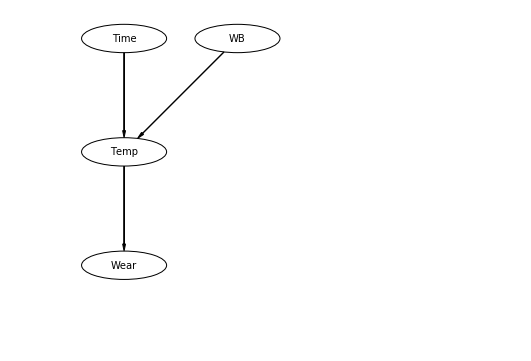

In [72]:
pgm = daft.PGM([9,6],origin=[1, 0.5])
pgm.add_node(daft.Node('Tme','Time',3,6,aspect=3))
pgm.add_node(daft.Node('WB','WB',5,6,aspect=3))
pgm.add_node(daft.Node('Temp','Temp',3,4,aspect=3))
pgm.add_node(daft.Node('Wear','Wear',3,2,aspect=3))
pgm.add_edge('Tme','Temp')
pgm.add_edge('WB','Temp')
pgm.add_edge('Temp','Wear')
pgm.render();


In [3]:
df = pd.read_csv('......Desktop/New folder/Temp.csv',sep=';')

df.index

RangeIndex(start=0, stop=15, step=1)

In [4]:
df.describe()

,Time,Temp,RunningTemp,Wear,Slot
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.466667,146.666667,212.533333,17.133333,8.000000
std,0.639940,63.994047,63.482131,5.208052,4.472136
min,1.000000,100.000000,152.000000,12.000000,1.000000
25%,1.000000,100.000000,163.000000,13.000000,4.500000
50%,1.000000,100.000000,193.000000,16.000000,8.000000
75%,2.000000,200.000000,250.500000,20.000000,11.500000
max,3.000000,300.000000,383.000000,31.000000,15.000000


In [5]:
temp_mean= df.Temp.mean()
temp_mean

146.66666666666666

In [6]:
df.skew()

Time           1.084627
Temp           1.084627
RunningTemp    1.473369
Wear           1.428295
Slot           0.000000
dtype: float64

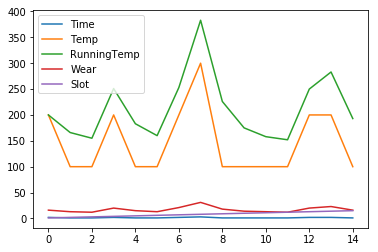

In [7]:
df.plot()
plt.show()

In [8]:
df.std

,Time,Temp,RunningTemp,Wear,Slot
0,2,200,200,16,1
1,1,100,166,13,2
2,1,100,155,12,3
3,2,200,251,20,4
4,1,100,183,15,5
5,1,100,160,13,6
6,2,200,253,21,7
7,3,300,383,31,8
8,1,100,226,18,9
9,1,100,175,14,10


In [61]:
model = pm.Model();
with model:
    time = pm.Normal('time',mu=df.Time.mean(),sd=df.Time.std())
    temp = pm.Normal('temp',mu=time)
    wear =pm.Normal('wear',mu=temp)
    trace = pm.sample(100000,tune=50000,progressbar=True)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
........AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████| 150000/150000 [02:46<00:00, 899.51it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011530A20>,
      dtype=object)

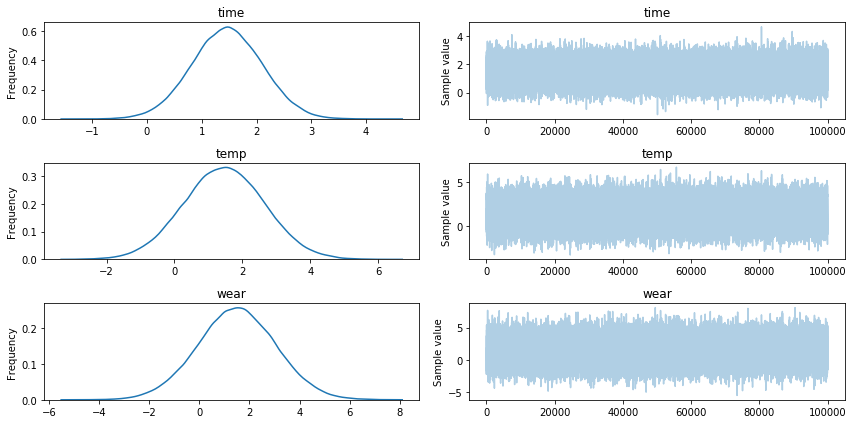

In [62]:
pm.traceplot(trace)

In [63]:
pm.summary(trace)


time:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.463            0.641            0.003            [0.227, 2.740]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.204          1.032          1.462          1.895          2.721


temp:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  1.461            1.192            0.006            [-0.876, 3.793]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.873         0.659          1.463          2.266          3.799


wear:

  Mean             SD               MC Error         95% HPD interval
  ---------------------------

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E3AAD68>,
      dtype=object)

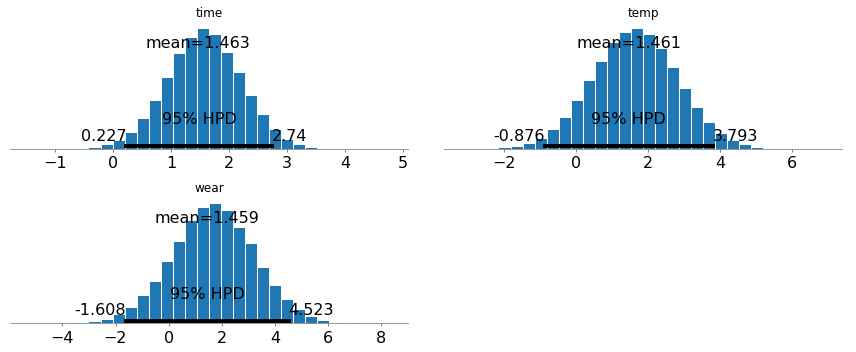

In [64]:
pm.plot_posterior(trace)

In [65]:
pred = pd.DataFrame({
    "Wear": trace["wear"][50000:],
    "Temp": trace["temp"][50000:],
    "Time": trace["time"][50000],
 
})


In [66]:
pred.Wear.mean()


1.4620120531843093

In [67]:
pred.Temp.mean()
loopTime = pred.Time.mean()
loopWear = pred.Wear.mean()
loopTemp = pred.Temp.mean()

In [68]:
loopWear

1.4620120531843093

In [69]:
loopTemp

1.4621301850431747

In [70]:
loopTime

2.694233622357851

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
........AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
100%|█████████████████████████████████| 150000/150000 [03:15<00:00, 766.81it/s]


4.170233580994139

Time2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.693            0.999            0.004            [0.782, 4.687]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.741          2.017          2.693          3.363          4.654


Temp2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  4.158            1.404            0.007            [1.384, 6.883]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.415          3.211          4.158          5.108          6.918


wear2:

  Mean             SD               MC Error         95% HPD interval
  -------

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████| 150000/150000 [02:30<00:00, 993.43it/s]


4.156056830463105

Time2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.692            0.992            0.005            [0.763, 4.656]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.749          2.022          2.693          3.364          4.645


Temp2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  4.155            1.410            0.007            [1.337, 6.839]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.396          3.192          4.169          5.114          6.903


wear2:

  Mean             SD               MC Error         95% HPD interval
  -------

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████████████████████████████| 150000/150000 [03:28<00:00, 720.03it/s]


4.150923572686017

Time2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.695            1.002            0.005            [0.751, 4.682]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.732          2.019          2.692          3.368          4.667


Temp2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  4.157            1.416            0.006            [1.360, 6.910]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.401          3.202          4.151          5.109          6.959


wear2:

  Mean             SD               MC Error         95% HPD interval
  -------

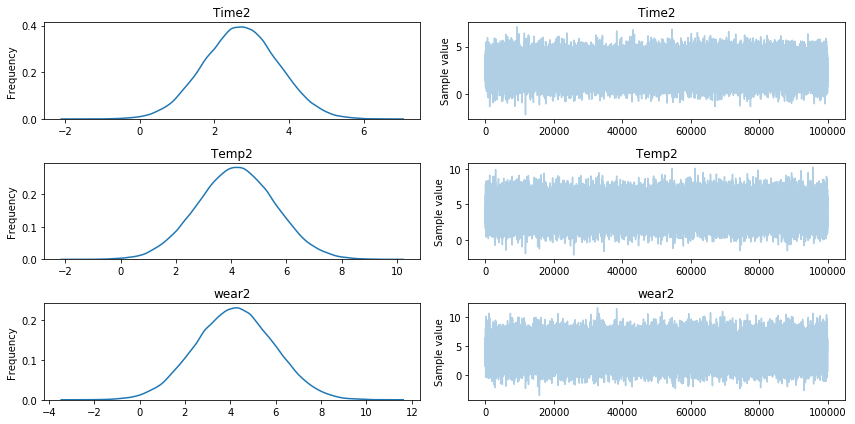

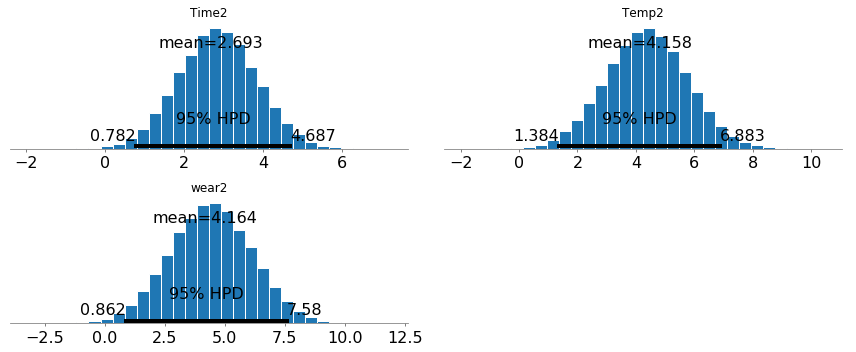

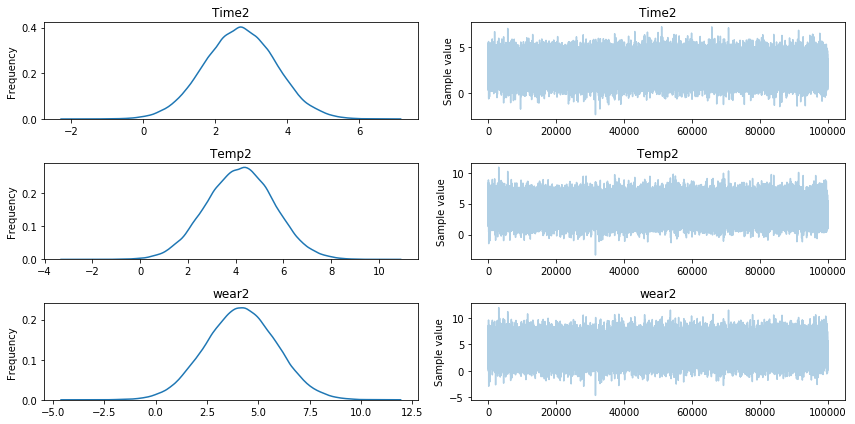

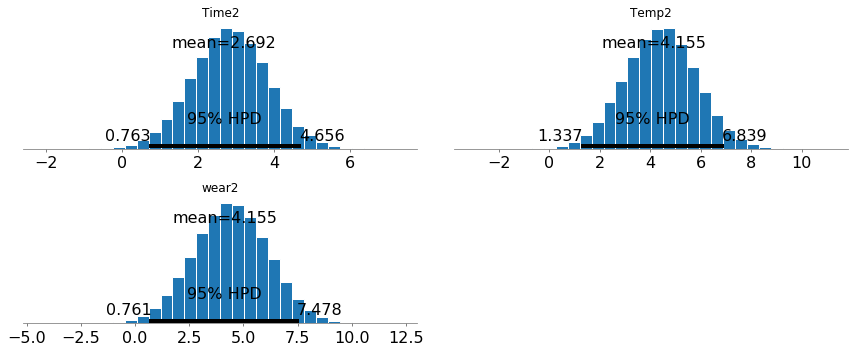

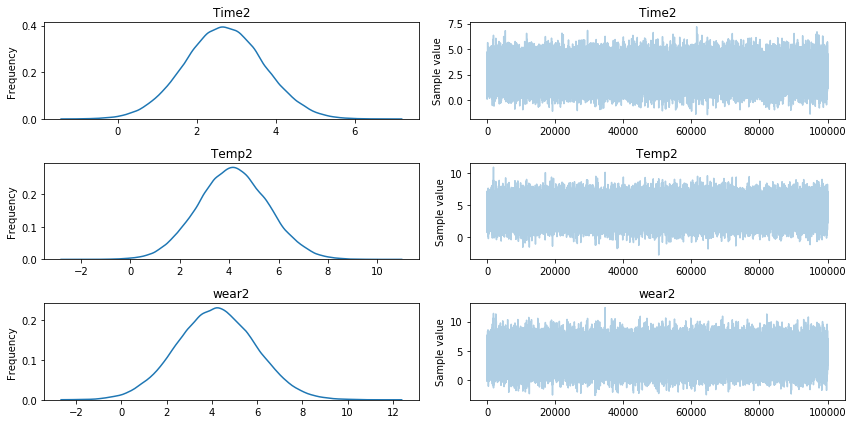

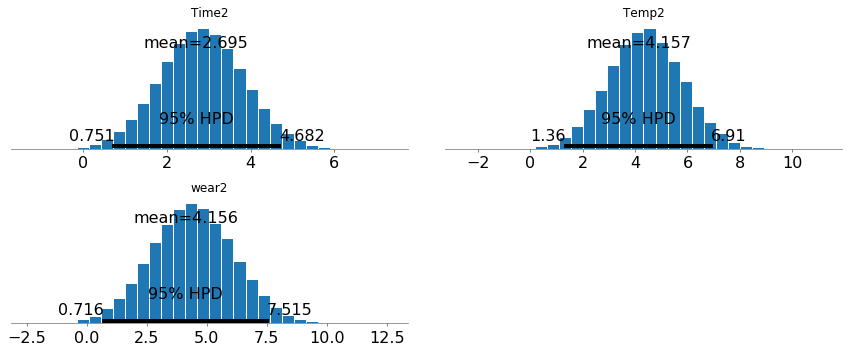

In [71]:
def mymodel(x,y):
    model2 = pm.Model();
    with model2:
        Time2  = pm.Normal('Time2',mu=x)
        Temp2  = pm.Normal('Temp2',mu=Time2+y)
        wear2  = pm.Normal('wear2',mu=Temp2)
        trace2 = pm.sample(100000,tune=50000,progressbar=True)
        pred2  = pd.DataFrame({
        "Wear2": trace2["wear2"][50000:],
        "temp2": trace2["Temp2"][50000:],
        "time2": trace2["Time2"][50000:],
        })
        loopTime = pred2.time2.mean()
        loopWear = pred2.Wear2.mean()
        
        print(loopWear)
        pm.traceplot(trace2)
        pm.summary(trace2)
        pm.plot_posterior(trace2)
        
for i in range(0,3):
    mymodel(loopTime,loopWear)
    
    
    
    